In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [21]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


In [22]:
print(p_big.shape)

(100, 80)


Solution
===

In [23]:
def euclidian_distance(q1,q2,p1,p2):
    return np.sqrt(np.square(q1-p1) + np.square(q2-p2))

def euclidian_distance_vec(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

def naive(p, q):
    ''' fill your code in here...
    '''
    array_list = []
    for coord1 in p:
        row_list = []
        for coord2 in q:
            dist = euclidian_distance_vec(coord1, coord2)
            row_list.append(dist)
        array_list.append(row_list)
    return np.array(array_list)

In [24]:
pairwise = naive(p,q)
pairwise1 = naive(p_big,q_big)

#should be a 
assert pairwise.shape[0] == p.shape[0]
assert pairwise.shape[1] == q.shape[0]

assert pairwise1.shape[0] == p_big.shape[0]
assert pairwise1.shape[1] == q_big.shape[0]

In [60]:
pairwise1

array([[3.5463562 , 3.565697  , 3.49523531, ..., 3.45806434, 3.45665815,
        3.81388442],
       [4.00188263, 3.53214057, 3.27800283, ..., 3.71310672, 3.95344582,
        3.59536741],
       [4.17522292, 3.56879999, 3.41938894, ..., 4.02732215, 3.92961253,
        3.58403141],
       ...,
       [3.62521939, 3.45146476, 3.80998935, ..., 4.28665811, 3.94376699,
        3.57750727],
       [3.74235978, 3.66972067, 3.58013781, ..., 3.84275737, 3.61753849,
        3.699406  ],
       [3.94677398, 3.3584521 , 3.90542048, ..., 3.52062854, 4.00497389,
        3.44475958]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [25]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [44]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows, cols = np.indices((p.shape[0],q.shape[0]))
    
    p_ravel = p[rows.ravel()]
    q_ravel = q[cols.ravel()]
    pairwise_list = []
    
    for i in range(0,p_ravel.shape[0]):
        pairwise_list.append(euclidian_distance_vec(p_ravel,q_ravel))

    return np.array(pairwise_list).reshape((p.shape[0],q.shape[0]))

In [53]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows, cols = np.indices((p.shape[0],q.shape[0]))
    
    p_ravel = p[rows.ravel()]
    q_ravel = q[cols.ravel()]
    
    raveled = np.sqrt(np.sum(np.square(p_ravel - q_ravel),axis = 1))
    
    return raveled.reshape((p.shape[0],q.shape[0]))

In [54]:
with_indices(p_big,q_big)

array([[3.5463562 , 3.565697  , 3.49523531, ..., 3.45806434, 3.45665815,
        3.81388442],
       [4.00188263, 3.53214057, 3.27800283, ..., 3.71310672, 3.95344582,
        3.59536741],
       [4.17522292, 3.56879999, 3.41938894, ..., 4.02732215, 3.92961253,
        3.58403141],
       ...,
       [3.62521939, 3.45146476, 3.80998935, ..., 4.28665811, 3.94376699,
        3.57750727],
       [3.74235978, 3.66972067, 3.58013781, ..., 3.84275737, 3.61753849,
        3.699406  ],
       [3.94677398, 3.3584521 , 3.90542048, ..., 3.52062854, 4.00497389,
        3.44475958]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [55]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

In [56]:
scipy_version(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Numpy Magic

In [57]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [58]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

70.8 ms ± 966 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.21 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
627 µs ± 5.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


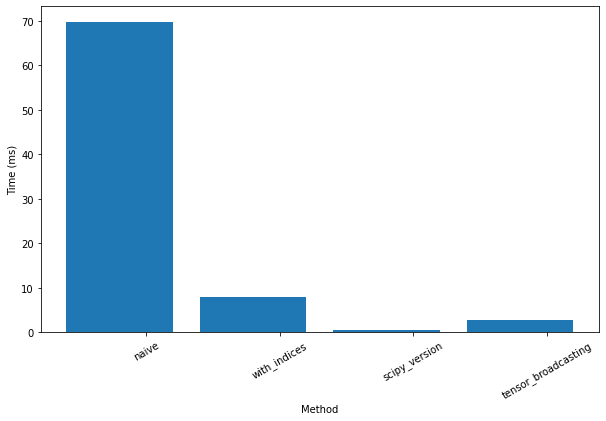

In [59]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()